In [1]:
from google.colab import userdata
HUGGINGFACE_TOKEN_KEY = userdata.get('HUGGINGFACE_TOKEN')

# Installation

In [2]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [3]:
!pip install huggingface_hub

# Setup the Environment

In [4]:
from langchain import HuggingFaceHub

In [5]:
llm=HuggingFaceHub(repo_id="mistralai/Mistral-7B-Instruct-v0.2",huggingfacehub_api_token=HUGGINGFACE_TOKEN_KEY)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.huggingface_hub.HuggingFaceHub` was deprecated in langchain-community 0.0.21 and will be removed in 0.2.0. Use HuggingFaceEndpoint instead.
  warn_deprecated(


In [6]:
text = "What would be a good company name for a company that makes colorful socks?"

In [7]:
llm(text)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


'What would be a good company name for a company that makes colorful socks?\n\nHere are some suggestions for a company name that makes colorful socks:\n\n1. Socktopia: This name suggests a fun and whimsical place where customers can find an endless supply of colorful socks.\n2. SockSational: This name emphasizes the exciting and extraordinary nature of the colorful socks.\n3. Rainbow Socks Co.: This name highlights the colorful aspect of the socks and creates a memorable and catchy name.\n4'

In [8]:
print(llm(text))

What would be a good company name for a company that makes colorful socks?

Here are some suggestions for a company name that makes colorful socks:

1. Socktopia: This name suggests a fun and whimsical place where customers can find an endless supply of colorful socks.
2. SockSational: This name emphasizes the exciting and extraordinary nature of the colorful socks.
3. Rainbow Socks Co.: This name highlights the colorful aspect of the socks and creates a memorable and catchy name.
4


In [9]:
print(llm.invoke(text))

What would be a good company name for a company that makes colorful socks?

Here are some suggestions for a company name that makes colorful socks:

1. Socktopia: This name suggests a fun and whimsical place where customers can find an endless supply of colorful socks.
2. SockSational: This name emphasizes the exciting and extraordinary nature of the colorful socks.
3. Rainbow Socks Co.: This name highlights the colorful aspect of the socks and creates a memorable and catchy name.
4


# Example 2

In [10]:
name = llm.invoke("I want to open a restaurant for chinese food. Suggest a fancy name for this.")
print(name)

I want to open a restaurant for chinese food. Suggest a fancy name for this.

Here are some suggestions for a fancy name for a Chinese restaurant:

1. Celestial Harmony: This name evokes the idea of a harmonious and elegant dining experience, with a nod to the Chinese belief in the celestial realm.
2. Jade Garden: Jade is a precious and luxurious material in Chinese culture, and a garden suggests a peaceful and serene atmosphere.
3. Phoenix Pearl: The phoenix is a symbol of rebirth


In [11]:
llm=HuggingFaceHub(repo_id="mistralai/Mistral-7B-Instruct-v0.2",huggingfacehub_api_token=HUGGINGFACE_TOKEN_KEY ,model_kwargs={"temperature":0.7,"max_length":64})
name = llm.invoke("I want to open a restaurant for chinese food. Suggest a fancy name for this?")
print(name)

I want to open a restaurant for chinese food. Suggest a fancy name for this?

There are a few considerations when choosing a fancy name for a Chinese restaurant. Here are some suggestions that may inspire you:

1. Dragon Pearl: This name suggests a touch of elegance and luxury, with the dragon representing power and prosperity, and the pearl representing beauty and value.
2. Celestial Garden: This name conjures up images of a beautiful, tranquil garden in the sky, where the gods reside. It suggests a refined


# 04 Prompt Templates

Currently in the above applications we are writing an entire prompt, if you are creating a user directed application then this is not an ideal case

Lanchain facilitates prompt management and optimization

Normally when you use an LLM in an application, you are not sending user input directly to the LLM. Instead, you need to take the user input and construct a prompt , and only then send that to that LLM.

In many Large Language Model applications we don't pass the user input directly to the Large Language Model, we add the user input to a large peice of text called prompt template.

# Example 1

In [12]:
from langchain.prompts import PromptTemplate

prompt_template_name = PromptTemplate(
    input_variables = ['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fancy name for this."
)

p = prompt_template_name.format(cuisine="Italian")
print(p)



I want to open a restaurant for Italian food. Suggest a fancy name for this.


# Example 2


In [13]:
prompt = PromptTemplate.from_template("What is a good name for a company that makes {product}")
prompt.format(product="colorful socks")

'What is a good name for a company that makes colorful socks'

# Chains

 Combine LLMs and prompts in multi-step workflows

 Now as we have the model:


```
 llm=HuggingFaceHub(repo_id="mistralai/Mistral-7B-Instruct-v0.2",huggingfacehub_api_token=HUGGINGFACE_TOKEN_KEY ,model_kwargs={"temperature":0.7,"max_length":64})
```




 and the **Prompt Template**:


```
 prompt = PromptTemplate.from_template("What is a good name for a company that makes {product}")
prompt.format(product="colorful socks")
```

Now using Chains we will link together model and the Prompt Template and other Chains
The simplest and most common type of chain is LLMChain, which passes the input first to Prompt Template and then to Large Language Model

LLMChain is responsible to execute the PromptTemplate, For every PromptTemplate we will specifically have an LLMChain.




# Example 1

In [14]:
prompt = PromptTemplate.from_template("Waht is a good name for a company that makes {product}")
prompt.format(product="colorful socks")

'Waht is a good name for a company that makes colorful socks'

In [15]:
from langchain.chains import LLMChain

chain = LLMChain(llm=llm, prompt=prompt)
response = chain.run("colorful socks")
#response
print(response)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


Waht is a good name for a company that makes colorful socks?

There are several possibilities for a company name that makes colorful socks:

1. Socktopia: This name suggests a fun and vibrant collection of socks that customers will love.
2. Colorful Socks Co.: This name is simple and straight to the point, highlighting the company's focus on colorful socks.
3. Happy Feet: This name conveys a sense of joy and comfort, which could appeal to people looking for socks that


# Example 2

In [16]:
from langchain.prompts import PromptTemplate

prompt_template_name = PromptTemplate(
    input_variables = ['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fancy name for this."
)

In [17]:
chain = LLMChain(llm=llm, prompt=prompt_template_name)
response=chain.run("Mexican")
print(response)

I want to open a restaurant for Mexican food. Suggest a fancy name for this.

For a fancy Mexican restaurant, consider the following name options:

1. "El Sabor de las Estrellas" - meaning "The Flavor of the Stars" in Spanish
2. "Nobleza Mexicana" - "Mexican Nobility" in Spanish
3. "Cielo Gourmet Mexican Kitchen" - "Heavenly Gourmet Mexican Kitchen"
4. "Riviera Azul" - "Blue Riv


In [18]:
chain = LLMChain(llm=llm, prompt=prompt_template_name, verbose=True)
response=chain.run("Mexican")
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
I want to open a restaurant for Mexican food. Suggest a fancy name for this.

> Finished chain.
I want to open a restaurant for Mexican food. Suggest a fancy name for this.

For a fancy Mexican restaurant, consider the following name options:

1. "El Sabor de las Estrellas" - meaning "The Flavor of the Stars" in Spanish
2. "Nobleza Mexicana" - "Mexican Nobility" in Spanish
3. "Cielo Gourmet Mexican Kitchen" - "Heavenly Gourmet Mexican Kitchen"
4. "Riviera Azul" - "Blue Riv


**Can we combine Multiple PromptTemplates, We will try to combine Multiple PromptTemplates**

**The output from the first PromptTemplate is passed to the next PromptTemplate as input**

**To combine the chain and to set a sequence for that we use SimpleSequentialChain**



**Simple Sequential Chain**

In [19]:
prompt_template_name = PromptTemplate(
    input_variables= ['cuisine'],
    template="I want to open a restaurant for {cuisine} food. Suggest a fancy name for this."
)

name_chain = LLMChain(llm=llm, prompt=prompt_template_name)

prompt_template_items = PromptTemplate(
    input_variables = ['restaurant_name'],
    template="Suggest some menu items for {restaurant_name}"
)

food_items_chain = LLMChain(llm=llm, prompt=prompt_template_items)

In [20]:
from langchain.chains import SimpleSequentialChain

chain = SimpleSequentialChain(chains = [name_chain, food_items_chain])
content = chain.run("indian")
print(content)

Suggest some menu items for I want to open a restaurant for indian food. Suggest a fancy name for this.

Here are some suggestions for a fancy name for your Indian restaurant:

1. Maharajah's Banquet: This name evokes the grandeur and opulence of the Indian Maharajahs, suggesting a luxurious dining experience.
2. Swasthi: Swasthi is a Sanskrit word meaning "health" and "well-being." This name suggests a focus on healthy, authentic Indian cuisine.
3. Rasika: Rasika is a Sanskrit word meaning "taste." This name suggests a focus on the delicious flavors of Indian cuisine.
4. Maya: Maya is a Sanskrit word meaning "illusion." This name could suggest a magical, dream-like dining experience.

As for menu items, here are some suggestions for a variety of dishes that represent the rich diversity of Indian cuisine:

1. Appetizers: Samos


**There is an issue with SimpleSequentialChain it only shows last input information**

**To show the entire information we can use SequentialChain**

# Sequential Chain

In [21]:
prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

name_chain =LLMChain(llm=llm, prompt=prompt_template_name, output_key="restaurant_name")

In [22]:
prompt_template_items = PromptTemplate(
    input_variables = ['restaurant_name'],
    template="Suggest some menu items for {restaurant_name}."
)

food_items_chain =LLMChain(llm=llm, prompt=prompt_template_items, output_key="menu_items")

In [23]:
from langchain.chains import SequentialChain

chain = SequentialChain(
    chains = [name_chain, food_items_chain],
    input_variables = ['cuisine'],
    output_variables = ['restaurant_name', "menu_items"]
)

In [24]:
print(chain({"cuisine": "indian"}))

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


{'cuisine': 'indian', 'restaurant_name': 'I want to open a restaurant for indian food. Suggest a fency name for this.\n\nThere are a few factors to consider when choosing a fancy name for an Indian restaurant. Here are some suggestions that might help inspire you:\n\n1. Cultural References: consider names that evoke the richness and complexity of Indian culture. For example, you might consider names inspired by Hindu mythology, Sanskrit words, or historical figures.\n2. Regional Specialties: you could choose a name that highlights a specific regional cuisine or dish. For example, "M', 'menu_items': 'Suggest some menu items for I want to open a restaurant for indian food. Suggest a fency name for this.\n\nThere are a few factors to consider when choosing a fancy name for an Indian restaurant. Here are some suggestions that might help inspire you:\n\n1. Cultural References: consider names that evoke the richness and complexity of Indian culture. For example, you might consider names insp

##**06. Agents and Tools**

Agents involve an LLM making decisions about which Actions to take, taking that Action, seeing an Observation, and repeating that until done.


When used correctly agents can be extremely powerful. In order to load agents, you should understand the following concepts:

- Tool: A function that performs a specific duty. This can be things like: Google Search, Database lookup, Python REPL, other chains.
- LLM: The language model powering the agent.
- Agent: The agent to use.


Agent is a very powerful concept in LangChain

For example I have to travel from Dubai to Canada, I type this in ChatGPT



---> Give me  two flight options from Dubai to Canada on September 1, 2023 | ChatGPT will not be able to answer because has knowledge till
September 2021



ChatGPT plus has Expedia Plugin, if we enable this plugin it will go to Expedia Plugin and will try to pull information about Flights & it will show the information

#**What exactly happens when we try to enable this plugin**

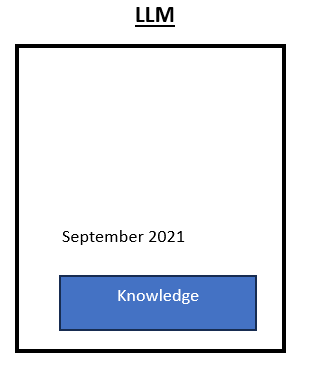

When we think about LLM. Many people think that it is just a knowledge engine, it has knowledge and it will try to give answer based on that knowledge but the knowledge is only limited to September 2021. The think that most people missout is that Large Lanaguage Model has a reasoning engine, and using that reasoning engine it can figure out when someone types this type of Question


Give me  two flight options from Dubai to Canada on September 1, 2023


As a human we go to Expedia as we have a reasoning engine in our brain.

LLM has a reasoning engine as well, so it will figure out the Source, Destination, Date and it will call Expedia Plugin and it will return response back.

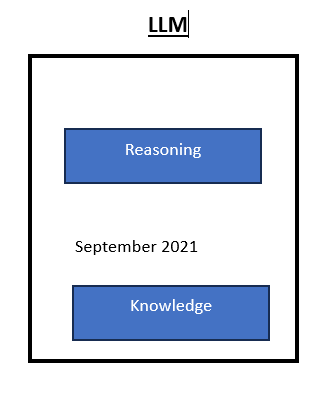

#**How much is US GDP in 2022? plus 5**

As LLM has a reasoning engine to answer that question it will go to Google Search Tool, it will find that answer and then it will use Math Tool and do plus 5

**An agent has access to a suite of tools, and determines which ones to use depending on the user input.**

#Agent will conenct with external tools and it will use LLM reasoning capabilities

All the tools like Google Search Tool and Math Tool are available as part of LangChain and you can configure  agent, so agent is nothing but using all these tools and LLM reasoning capabilities to perform a given task  

#To access Google Search Results in Real Time we use serpapi

#### serpapi and llm-math tool

If you're using a text LLM, first try zero-shot-react-description, aka. the MRKL agent for LLMs.


If you're using a Chat Model, try chat-zero-shot-react-description, aka. the MRKL agent for Chat Models.


If you're using a Chat Model and want to use memory, try chat-conversational-react-description, the Conversational agent.


If you have a complex task that requires many steps and you're interested in experimenting with a new type of agent, try the Plan-and-Execute agent.

In [25]:
!pip install google-search-results

  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32004 sha256=02c05fb5b2eceba28f7da94ac0a97e27f93e30cb0653e2c7407a36846b5298fa
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results


SerpApi is a real-time API to access Google search results.

https://serpapi.com/

In [26]:
import os

os.environ['SERPAPI_API_KEY'] = '81a277d426111ffd7432789954767641ab8098441bf67259d4fe01adf815cb6d'

In [28]:
from langchain.agents import AgentType, initialize_agent, load_tools


llm=HuggingFaceHub(repo_id="mistralai/Mistral-7B-Instruct-v0.2",huggingfacehub_api_token=HUGGINGFACE_TOKEN_KEY ,model_kwargs={"temperature":0.7,"max_length":64})

#Google search API
# The tools we'll give the Agent access to. Note that the 'llm-math' tool uses an LLM, so we need to pass that in.
tools = load_tools(["serpapi", "llm-math"], llm=llm)

# Finally, let;s initialize an agent with the tools, the language model, and the type of agent we want to use.
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

#Let's test it out!
agent.run("what was the GDP of US in 2023?")




> Entering new AgentExecutor chain...
Answer the following questions as best you can. You have access to the following tools:

Search: A search engine. Useful for when you need to answer questions about current events. Input should be a search query.
Calculator: Useful for when you need to answer questions about math.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [Search, Calculator]
Action Input: the input to the action
Observation: the action to take, should be one of [Search, Calculator] is not a valid tool, try one of [Search, Calculator].
Thought:Answer the following questions as best you can. You have access to the following tools:

Search: A search engine. Useful for when you need to answer questions about current events. Input should be a search query.
Calculator: Useful for when you need to answer questions about math.

Use the following format:

Question

'Agent stopped due to iteration limit or time limit.'

#### Wikipedia and llm-math tool

In [29]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=1225a0d5a3891e856cc857ccbc82e3733036bbe47ea2f7da446baa45a7f2cda1
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [30]:
tools = load_tools(["wikipedia", "llm-math"], llm=llm)

# Finally, let;s initialize an agent with the tools, the language model, and the type of agent we want to use.
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

#Let's test it out!
agent.run("In what year was the film Departed with Leopnardo Dicaprio released? What is this year raised to the 0.43 power?")



> Entering new AgentExecutor chain...
Answer the following questions as best you can. You have access to the following tools:

wikipedia: A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.
Calculator: Useful for when you need to answer questions about math.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [wikipedia, Calculator]
Action Input: the input to the action
Observation: the action to take, should be one of [wikipedia, Calculator] is not a valid tool, try one of [wikipedia, Calculator].
Thought:Answer the following questions as best you can. You have access to the following tools:

wikipedia: A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical

'Agent stopped due to iteration limit or time limit.'

# 07:Memory

Chatbot application like ChatGPT, you will notice that it remember past information

In [31]:
llm=HuggingFaceHub(repo_id="mistralai/Mistral-7B-Instruct-v0.2",huggingfacehub_api_token=HUGGINGFACE_TOKEN_KEY ,model_kwargs={"temperature":0.7,"max_length":64})


In [33]:
llm.invoke("Give me some fancy name of chai")

'Give me some fancy name of chai and I’ll make it for you. Masala Chai, Cardamom Chai, Ginger Chai, Cinnamon Chai, Rose Chai, Chocolate Chai, Jasmine Chai, I could go on and on. I’m not limited to one kind of tea, but I do have a few favorites.\n\nMy all time favorite is Cardamom Chai. I love the aroma of cardamom, the taste is sweet,'

In [34]:
from langchain.prompts import PromptTemplate

prompt_template_name = PromptTemplate(
    input_variables=['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. suggest a fency name for this."
)

In [35]:
from langchain.chains import LLMChain

chain = LLMChain(llm=llm, prompt=prompt_template_name)
name = chain.run("Mexican")
print(name)

I want to open a restaurant for Mexican food. suggest a fency name for this. any name will do as long as it Spanish or Mexican origin.

Here are some suggestions for a fancy Mexican restaurant name with a Spanish or Mexican origin:

1. El Sabor de Mi Patria (The Flavor of My Homeland)
2. La Casa de las Mil Flores (The House of a Thousand Flowers)
3. El Jardín Secreto (The Secret Garden)
4. La Fonda del Sol (The Inn


In [36]:
name = chain.run("Indian")
print(name)

I want to open a restaurant for Indian food. suggest a fency name for this.

There are several ways to approach creating a fancy name for an Indian restaurant. Here are some suggestions:

1. Use words that evoke the richness and complexity of Indian cuisine. Consider names that include words like "spice," "flavor," "saffron," "curry," "tandoor," or "masala."
2. Use names that reflect the history and culture of India. Consider names that include words like "mogul," "


In [37]:
chain.memory

In [38]:
type(chain.memory)

NoneType

# ConversationBufferMemory

We can attach memory to remember all previous conversation

In [39]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory()

chain = LLMChain(llm=llm, prompt=prompt_template_name, memory=memory)
name = chain.run("Mexican")
print(name)

I want to open a restaurant for Mexican food. suggest a fency name for this. any name will do as long as it Spanish or Mexican origin.

Here are some suggestions for a fancy Mexican restaurant name with a Spanish or Mexican origin:

1. El Sabor de Mi Patria (The Flavor of My Homeland)
2. La Casa de las Mil Flores (The House of a Thousand Flowers)
3. El Jardín Secreto (The Secret Garden)
4. La Fonda del Sol (The Inn


In [40]:
name = chain.run("Arabic")
print(name)


I want to open a restaurant for Arabic food. suggest a fency name for this.

A few suggestions for a fancy name for an Arabic restaurant:

1. Aladdin's Table: This name evokes the magical and exotic atmosphere of Arabian folklore.
2. Sultans' Feast: Suggests a royal and luxurious dining experience.
3. Arabesque: Refers to the intricate and beautiful patterns found in Arabic art and architecture.
4. Farah: Means "joy" or "


In [41]:
print(chain.memory.buffer)

Human: Mexican
AI: I want to open a restaurant for Mexican food. suggest a fency name for this. any name will do as long as it Spanish or Mexican origin.

Here are some suggestions for a fancy Mexican restaurant name with a Spanish or Mexican origin:

1. El Sabor de Mi Patria (The Flavor of My Homeland)
2. La Casa de las Mil Flores (The House of a Thousand Flowers)
3. El Jardín Secreto (The Secret Garden)
4. La Fonda del Sol (The Inn
Human: Arabic
AI: I want to open a restaurant for Arabic food. suggest a fency name for this.

A few suggestions for a fancy name for an Arabic restaurant:

1. Aladdin's Table: This name evokes the magical and exotic atmosphere of Arabian folklore.
2. Sultans' Feast: Suggests a royal and luxurious dining experience.
3. Arabesque: Refers to the intricate and beautiful patterns found in Arabic art and architecture.
4. Farah: Means "joy" or "


# ConversationChain

Conversation buffer memory goes growing endlessly

Just remember last 5 Conversation Chain

Just remember last 10-20 Conversation Chain



In [42]:
from langchain.chains import ConversationChain

convo = ConversationChain(llm=llm)
print(convo.prompt.template)

The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
{history}
Human: {input}
AI:


In [43]:
convo.run("Who won the first cricket world cup? ")

"The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.\n\nCurrent conversation:\n\nHuman: Who won the first cricket world cup? \nAI: The first Cricket World Cup was held in 1975 in England. The winner was the West Indies team, which was captained by Clive Lloyd. They defeated Australia in the final match at Lord's Cricket Ground. The West Indies team consisted of players like Vivian Richards, Michael Holding, and Clive Lloyd himself. They scored 291 runs for the loss of 7 wickets in 60 overs. In response, Australia scored"

In [45]:
convo.run("How much is 5+5?")

"The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.\n\nCurrent conversation:\nHuman: Who won the first cricket world cup? \nAI: The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.\n\nCurrent conversation:\n\nHuman: Who won the first cricket world cup? \nAI: The first Cricket World Cup was held in 1975 in England. The winner was the West Indies team, which was captained by Clive Lloyd. They defeated Australia in the final match at Lord's Cricket Ground. The West Indies team consisted of players like Vivian Richards, Michael Holding, and Clive Lloyd himself. They scored 291 runs for the loss of 7 wickets in 60 overs. In response, Austr

In [46]:
convo.run("Who was the captain ofthe winning team?")

"The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.\n\nCurrent conversation:\nHuman: Who won the first cricket world cup? \nAI: The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.\n\nCurrent conversation:\n\nHuman: Who won the first cricket world cup? \nAI: The first Cricket World Cup was held in 1975 in England. The winner was the West Indies team, which was captained by Clive Lloyd. They defeated Australia in the final match at Lord's Cricket Ground. The West Indies team consisted of players like Vivian Richards, Michael Holding, and Clive Lloyd himself. They scored 291 runs for the loss of 7 wickets in 60 overs. In response, Austr

In [47]:
print(convo.memory.buffer)

Human: Who won the first cricket world cup? 
AI: The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Who won the first cricket world cup? 
AI: The first Cricket World Cup was held in 1975 in England. The winner was the West Indies team, which was captained by Clive Lloyd. They defeated Australia in the final match at Lord's Cricket Ground. The West Indies team consisted of players like Vivian Richards, Michael Holding, and Clive Lloyd himself. They scored 291 runs for the loss of 7 wickets in 60 overs. In response, Australia scored
Human: How much is 5+5?
AI: The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not

##**ConversationBufferWindowMemory**

In [48]:
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=1)

convo = ConversationChain(
    llm=llm,
    memory=memory
)
convo.run("Who won the first cricket world cup?")

"The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.\n\nCurrent conversation:\n\nHuman: Who won the first cricket world cup?\nAI: The first Cricket World Cup was held in 1975 in England. Six teams participated in this inaugural event: Australia, England, New Zealand, Pakistan, South Africa, and the West Indies. The final match took place on June 21, 1975, at Lord's Cricket Ground, London. The West Indies won the tournament, defeating Australia by 17 runs. Clive Lloyd captained the West Indies team, and"

In [49]:
convo.run("How much is 5+5?")

"The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.\n\nCurrent conversation:\nHuman: Who won the first cricket world cup?\nAI: The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.\n\nCurrent conversation:\n\nHuman: Who won the first cricket world cup?\nAI: The first Cricket World Cup was held in 1975 in England. Six teams participated in this inaugural event: Australia, England, New Zealand, Pakistan, South Africa, and the West Indies. The final match took place on June 21, 1975, at Lord's Cricket Ground, London. The West Indies won the tournament, defeating Australia by 17 runs. Clive Lloyd captained the West Indies team, and\nHuman:

In [50]:
convo.run("Who was the captain of the winning team?")

"The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.\n\nCurrent conversation:\nHuman: How much is 5+5?\nAI: The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.\n\nCurrent conversation:\nHuman: Who won the first cricket world cup?\nAI: The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.\n\nCurrent conversation:\n\nHuman: Who won the first cricket world cup?\nAI: The first Cricket World Cup was held in 1975 in England. Six teams participated in this inaugural e

In [51]:
print(convo.memory.buffer)

Human: Who was the captain of the winning team?
AI: The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: How much is 5+5?
AI: The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Who won the first cricket world cup?
AI: The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Who won the first cricket world cup?
AI: The first Cricket World Cup was held in 1975 in England. Six 